In [1]:
import chollaread
import yt
import trident
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0', cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-02-24 16:07:46,142 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-02-24 16:07:46,142 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-02-24 16:07:46,143 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-02-24 16:07:46,144 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-02-24 16:07:46,144 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
def slicep(direction, ray1=False, ray2=False):
    
    get_cmap("cet_bmw")
    sl = yt.SlicePlot(ds, direction, [("density")])
    sl.set_cmap(("density"), "cet_bmw")
    
    if ray1==True:
        sl.annotate_ray(ray_, arrow=True)
    if ray2==True:
        sl.annotate_ray(ray_2, arrow=True)
    
    sl.show()

In [5]:
def spec_avg(x0, y0, z0, x, y, z, Nx, Nz,
             line, lmin, lmax, dl=None,
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, amu=None, instrument=False,
             DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    R = []
    B = []

    
    for i in range(Nx):
        for j in range(Nz):
        
            ray_start = np.array([x0+(i*cu),y0,z0+(j*cu)])*k
            ray_end = np.array([x+(i*cu),y,z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')
            
            R_val = (Nx-i)/Nx
            R.append(R_val)
            B_val = (Nz-j)/Nz
            B.append(B_val)
        

            
            if instrument==False:
                sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dl)
                
                
            else:
                sg = trident.SpectrumGenerator(instrument)
        
            
            if DIY==False:
            
                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')
                
            else:
                sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None, identifier=line)

                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
  
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Nx*Nz): # N = Nx * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
#     reds = get_cmap('cet_CET_L18')
#     colors = reds(np.linspace(0.25,1,Nx*Nz))
        
    fig = plt.figure(figsize=(15, 5))
    
#     for p in range(Nx*Nz):
#         plt.plot(arrays[0][0], arrays[p][1], alpha=0.5, color=[R[p],0,B[p]])
    
    if instrument==False:
        plt.plot(arrays[0][0], avg, color='black',label = "Average Spectrum", linewidth=1.75)
        plt.xlim(lmin, lmax)
        plt.title("'140.h5.0'"+line+r' d$\lambda$='+str(dl))
        plt.legend(fontsize='large')
        plt.xlabel('Wavelength')
        plt.ylabel('Relative Flux')
        
    else:
        plt.plot(arrays[0][0], avg, color='black',label = "Average Spectrum", linewidth=1.75)
        plt.xlim(lmin, lmax)
        plt.title("'140.h5.0'"+line+' '+instrument)
        plt.legend(fontsize='large')
        plt.xlabel('Wavelength')
        plt.ylabel('Relative Flux')
        
    print(R)
    print(B)
    
    return arrays[0][0], avg
    

In [6]:
def get_N(a0, a):
    return (a-a0)*256

# Slice Plot units to Projection Plot units
def stp_z(z):
    return(z*10)-5

def stp_x(x):
    return (x*10)-10

yt : [INFO     ] 2022-02-24 16:07:46,600 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:07:46,604 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:07:47,430 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-02-24 16:07:47,523 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:07:47,524 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:07:47,524 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:07:47,525 Parameters: domain_right_edge    


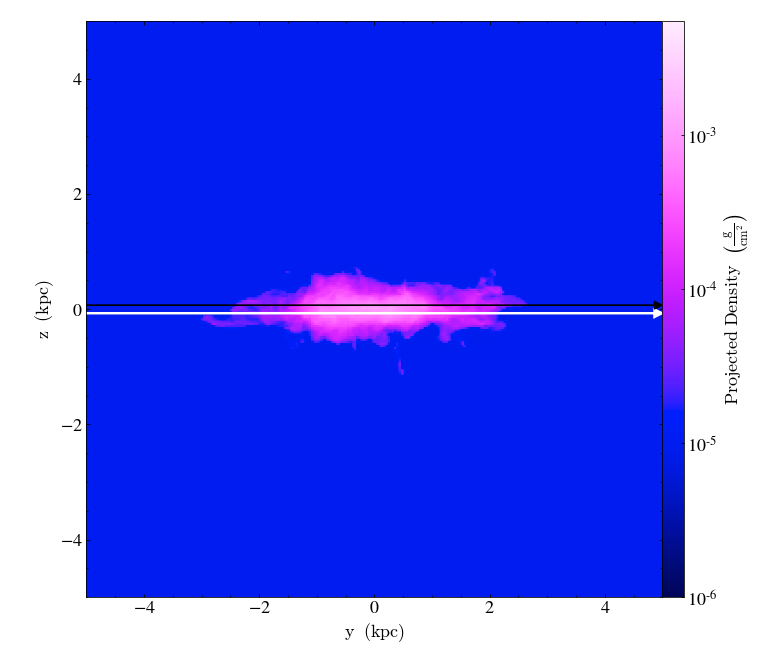

yt : [INFO     ] 2022-02-24 16:07:56,013 Projection completed
yt : [INFO     ] 2022-02-24 16:07:56,013 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-24 16:07:56,014 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-24 16:07:56,015 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-24 16:07:56,015 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-24 16:07:56,016 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: inval


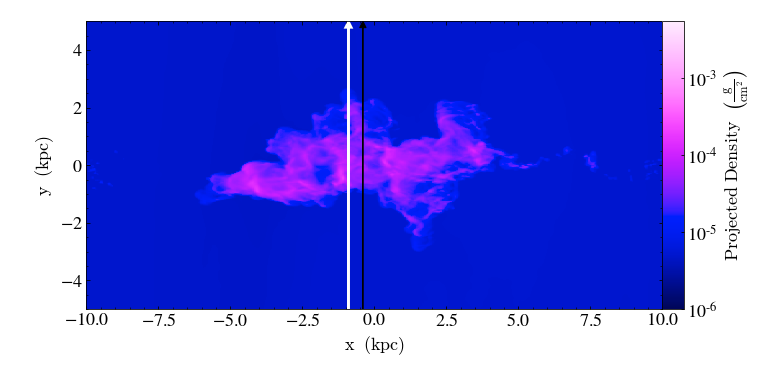

yt : [INFO     ] 2022-02-24 16:07:59,366 Projection completed
yt : [INFO     ] 2022-02-24 16:07:59,367 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-24 16:07:59,367 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-24 16:07:59,367 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-24 16:07:59,368 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-24 16:07:59,369 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


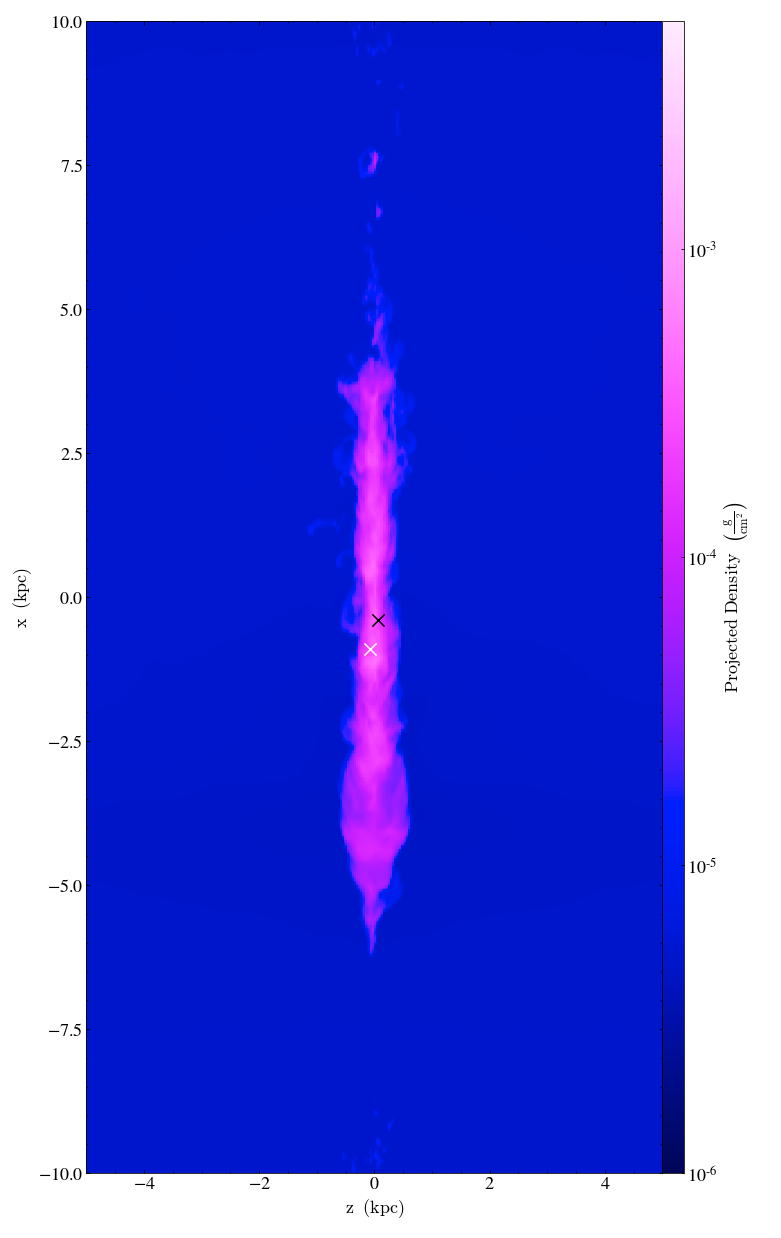

In [7]:
ray1 = make_ray(0.91,0,0.493,0.91,1,0.493)
ray2 = make_ray(0.96,0,0.507,0.96,1,0.507)

px = yt.ProjectionPlot(ds, 'x', 'density')
px.set_cmap(("density"), "cet_bmw")
px.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
px.annotate_ray(ray1, arrow=True)
px.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
px.show()

pz = yt.ProjectionPlot(ds, 'z', 'density')
pz.set_cmap(("density"), "cet_bmw")
pz.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
pz.annotate_ray(ray1, arrow=True)
pz.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
pz.show()

py = yt.ProjectionPlot(ds, 'y', 'density')
py.set_cmap(("density"), "cet_bmw")
py.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
py.annotate_marker((-0.07,-0.9), coord_system="plot", plot_args={"color":"white", "s": 150})
py.annotate_marker((0.07, -0.4), coord_system="plot", plot_args={"color":"black", "s": 150})
py.show()

In [10]:
stp_z(0.493)

-0.07000000000000028

In [11]:
stp_z(0.507)

0.07000000000000028

In [12]:
nxs = get_N(0.91, 0.96)
nzs = get_N(0.493, 0.507)

print(nxs, nzs)

12.799999999999983 3.584000000000003


## C IV

yt : [INFO     ] 2022-02-24 16:09:41,711 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:09:41,714 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:09:42,236 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:09:42,320 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:09:42,321 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:09:42,321 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:09:42,321 Parameters: domain_right_edge     

[1.0]
[1.0]


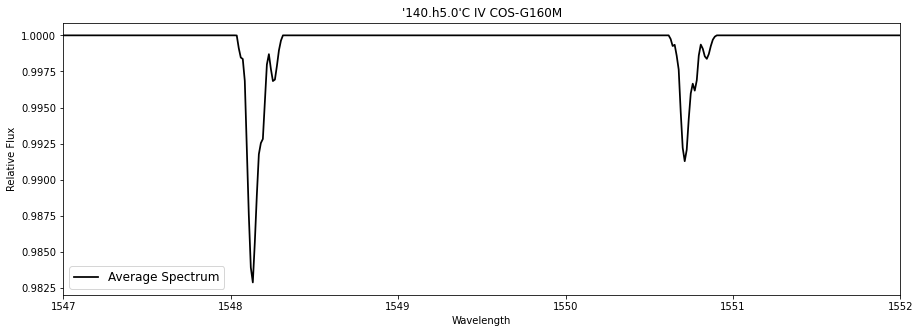

In [13]:
CIVCOS = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'C IV' ,1547,1552, instrument='COS-G160M')

yt : [INFO     ] 2022-02-24 16:09:43,224 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:09:43,226 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:09:43,748 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:09:43,833 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:09:43,833 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:09:43,834 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:09:43,834 Parameters: domain_right_edge     

[1.0]
[1.0]


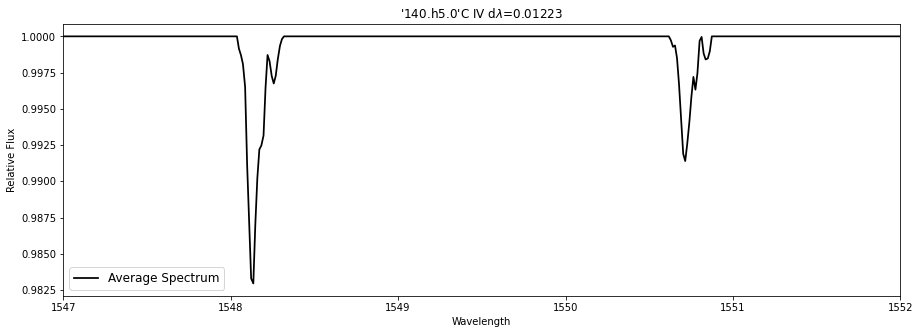

In [14]:
CIVman = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'C IV' ,1547,1552, dl=0.01223)

yt : [INFO     ] 2022-02-24 16:10:04,315 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:10:04,318 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:10:04,892 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:10:04,982 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:10:04,982 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:10:04,983 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:10:04,983 Parameters: domain_right_edge     

[1.0]
[1.0]


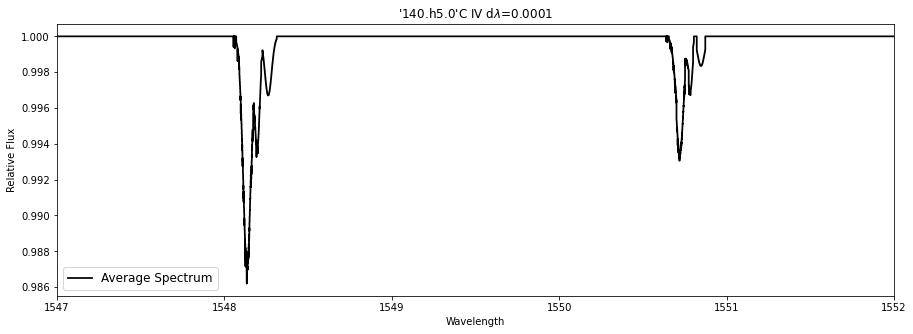

In [15]:
CIVman3 = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'C IV' ,1547,1552, dl=0.0001)

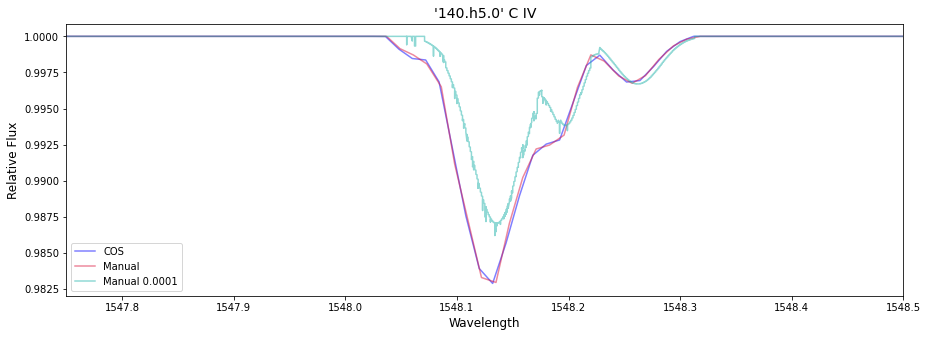

In [18]:
CIVcosx = CIVCOS[0]
CIVcosy = CIVCOS[1]

CIVx = CIVman[0]
CIVy = CIVman[1]

CIVx3 = CIVman3[0]
CIVy3 = CIVman3[1]

plt.figure(figsize=(15,5))
plt.plot(CIVcosx,CIVcosy, color='blue', alpha=0.5, label='COS')
plt.plot(CIVx,CIVy, color='crimson', alpha=0.5, label='Manual')
plt.plot(CIVx3,CIVy3, color='lightseagreen', alpha=0.5, label='Manual 0.0001')
plt.title("'140.h5.0' C IV", fontsize=14)
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Relative Flux', fontsize=12)
plt.xlim(1547.75, 1548.5)
plt.legend()

## Ly a

yt : [INFO     ] 2022-02-22 14:43:25,509 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-22 14:43:25,512 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-22 14:43:26,014 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-22 14:43:26,088 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-22 14:43:26,088 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-22 14:43:26,089 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-22 14:43:26,089 Parameters: domain_right_edge     

[1.0]
[1.0]


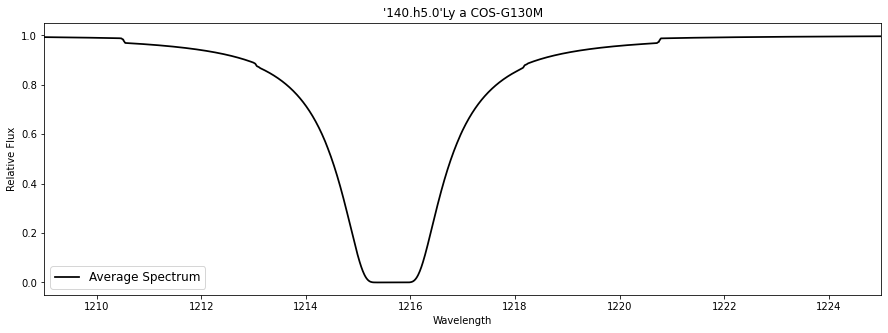

In [13]:
HI = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'Ly a' ,1209,1225, instrument='COS-G130M')

yt : [INFO     ] 2022-02-22 14:44:45,792 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-22 14:44:45,794 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-22 14:44:46,302 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-22 14:44:46,377 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-22 14:44:46,377 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-22 14:44:46,377 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-22 14:44:46,378 Parameters: domain_right_edge     

[1.0]
[1.0]


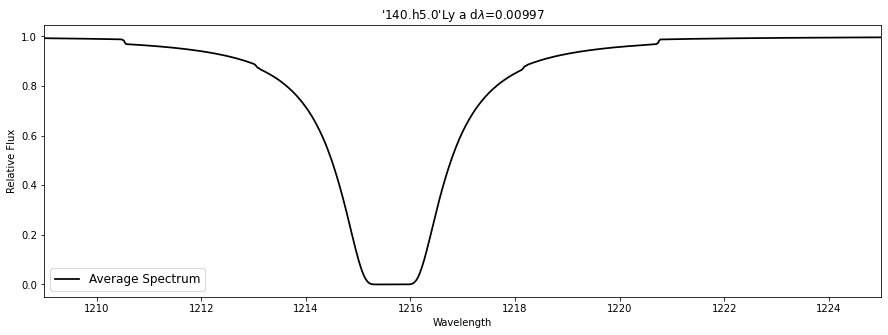

In [14]:
HI2 = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'Ly a' ,1209,1225, dl=0.00997)

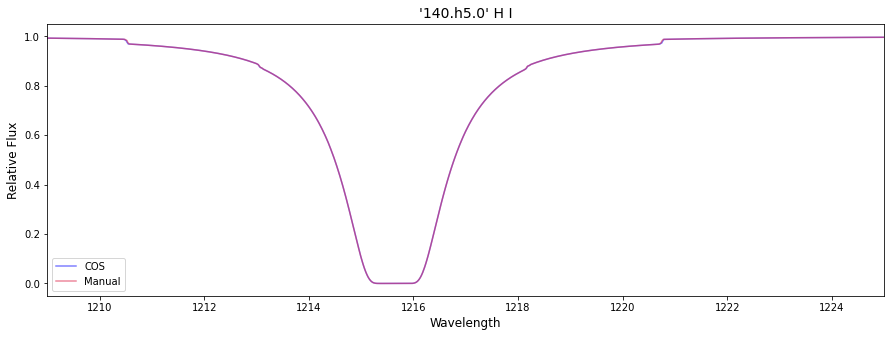

In [18]:
HIcosx = HI[0]
HIcosy = HI[1]

HIx = HI2[0]
HIy = HI2[1]

plt.figure(figsize=(15,5))
plt.plot(HIcosx,HIcosy, color='blue', alpha=0.5, label='COS')
plt.plot(HIx,HIy, color='crimson', alpha=0.5, label='Manual')
plt.title("'140.h5.0' H I", fontsize=14)
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Relative Flux', fontsize=12)
plt.xlim(1209, 1225)
plt.legend()

## Si IV 1393

yt : [INFO     ] 2022-02-24 16:17:38,322 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:17:38,325 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:17:38,844 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:17:38,934 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:17:38,935 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:17:38,935 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:17:38,936 Parameters: domain_right_edge     

[1.0]
[1.0]


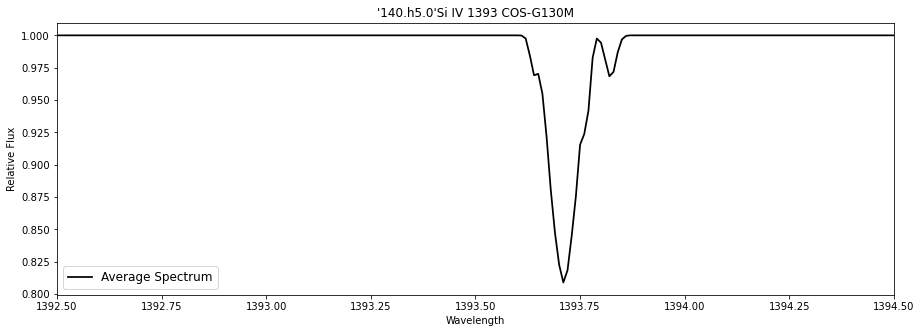

In [19]:
SiIV1393 = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'Si IV 1393',1392.5,1394.5,
                   el='Si', rom_num='IV', lrest=1393.76, gamma=9.0E+8, f_value=5.24E-01, 
                   amu=28.08,DIY=True, instrument='COS-G130M')

yt : [INFO     ] 2022-02-24 16:17:39,872 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:17:39,874 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:17:40,398 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:17:40,485 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:17:40,486 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:17:40,486 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:17:40,486 Parameters: domain_right_edge     

[1.0]
[1.0]


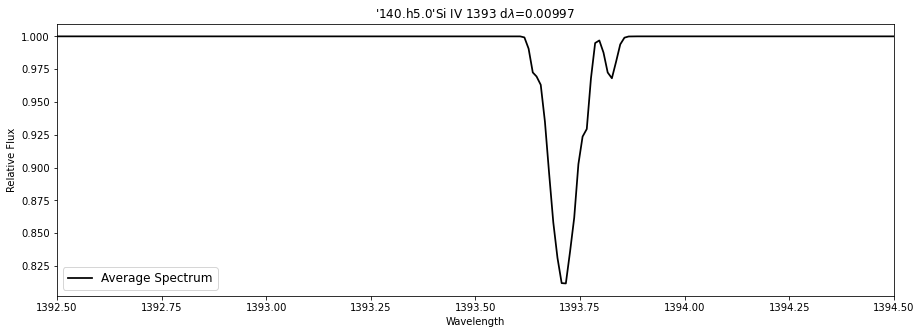

In [20]:
SiIV1393_2 = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'Si IV 1393',1392.5,1394.5,
                   el='Si', rom_num='IV', lrest=1393.76, gamma=9.0E+8, f_value=5.24E-01, 
                   amu=28.08,DIY=True, dl=0.00997)

yt : [INFO     ] 2022-02-24 16:17:56,567 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:17:56,571 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:17:57,088 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:17:57,176 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:17:57,177 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:17:57,177 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:17:57,177 Parameters: domain_right_edge     

[1.0]
[1.0]


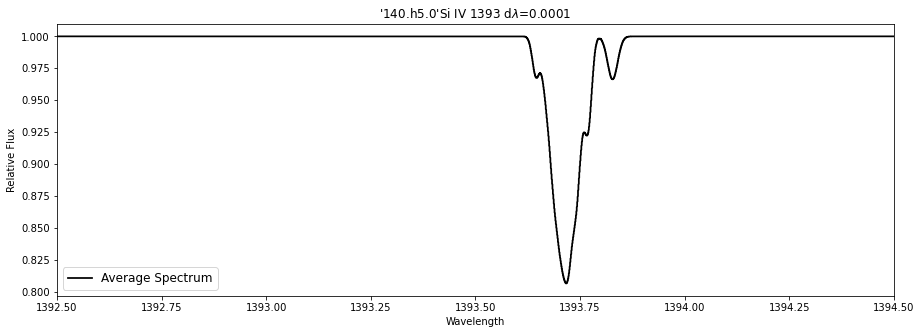

In [21]:
SiIV1393_3 = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'Si IV 1393',1392.5,1394.5,
                   el='Si', rom_num='IV', lrest=1393.76, gamma=9.0E+8, f_value=5.24E-01, 
                   amu=28.08,DIY=True, dl=0.0001)

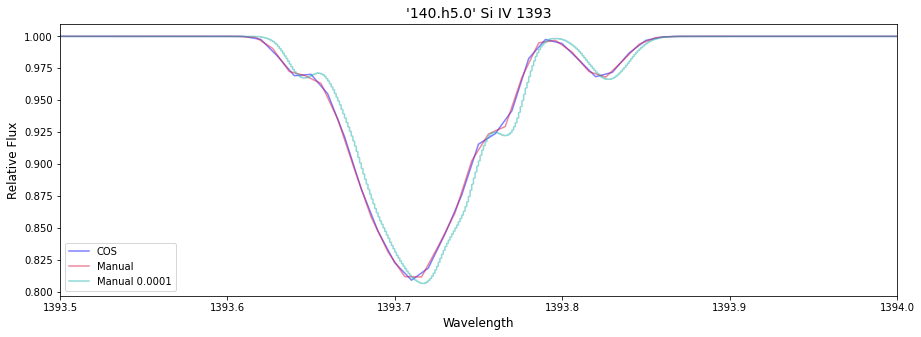

In [23]:
Sicosx = SiIV1393[0]
Sicosy = SiIV1393[1]

Six = SiIV1393_2[0]
Siy = SiIV1393_2[1]

Six3 = SiIV1393_3[0]
Siy3 = SiIV1393_3[1]

plt.figure(figsize=(15,5))
plt.plot(Sicosx,Sicosy, color='blue', alpha=0.5, label='COS')
plt.plot(Six,Siy, color='crimson', alpha=0.5, label='Manual')
plt.plot(Six3,Siy3, color='lightseagreen', alpha=0.5, label='Manual 0.0001')
plt.title("'140.h5.0' Si IV 1393", fontsize=14)
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Relative Flux', fontsize=12)
plt.xlim(1393.5, 1394)
plt.legend()

## Al III 1854

yt : [INFO     ] 2022-02-24 16:09:16,742 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:09:16,745 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:09:17,259 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:09:17,339 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:09:17,339 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:09:17,340 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:09:17,340 Parameters: domain_right_edge     

[1.0]
[1.0]


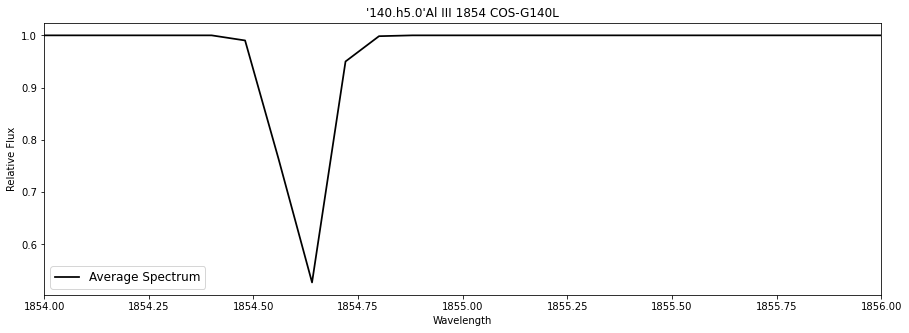

In [10]:
AlIII = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'Al III 1854',1854,1856,
                el='Al', rom_num='III', lrest=1854.72, gamma=5.57E+08, f_value=5.75E-01, 
                amu=26.98,DIY=True, instrument='COS-G140L')

yt : [INFO     ] 2022-02-24 16:09:18,603 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:09:18,606 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:09:19,123 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:09:19,213 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:09:19,213 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:09:19,214 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:09:19,215 Parameters: domain_right_edge     

[1.0]
[1.0]


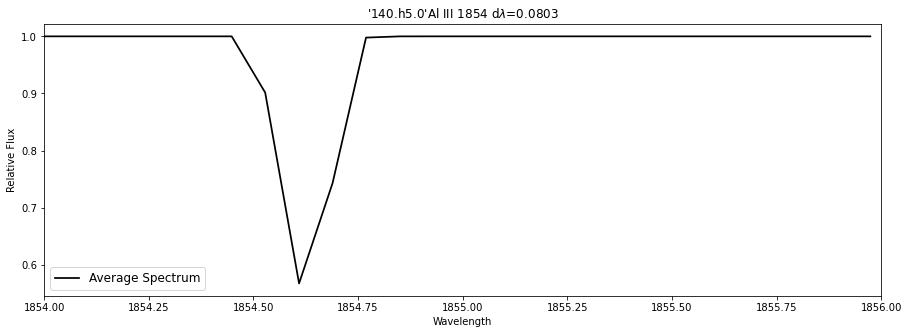

In [11]:
AlIII_2 = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'Al III 1854',1854,1856,
                el='Al', rom_num='III', lrest=1854.72, gamma=5.57E+08, f_value=5.75E-01, 
                amu=26.98,DIY=True, dl=0.0803)

yt : [INFO     ] 2022-02-24 16:08:19,088 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-24 16:08:19,090 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-24 16:08:19,840 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-24 16:08:19,933 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-24 16:08:19,933 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-24 16:08:19,934 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-24 16:08:19,934 Parameters: domain_right_edge     

[1.0]
[1.0]


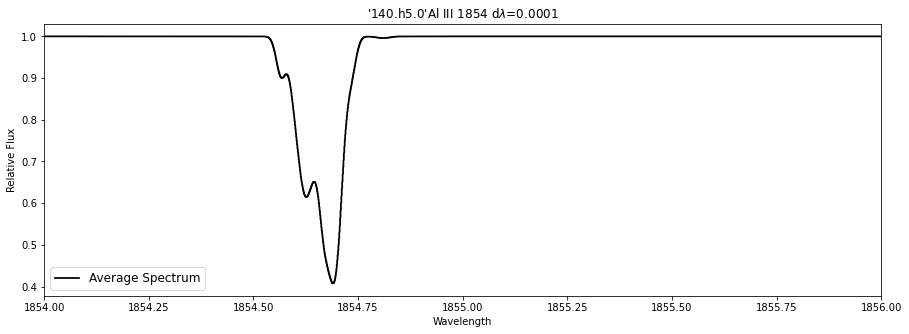

In [8]:
AlIII_3 = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'Al III 1854',1854,1856,
                el='Al', rom_num='III', lrest=1854.72, gamma=5.57E+08, f_value=5.75E-01, 
                amu=26.98,DIY=True, dl=0.0001)

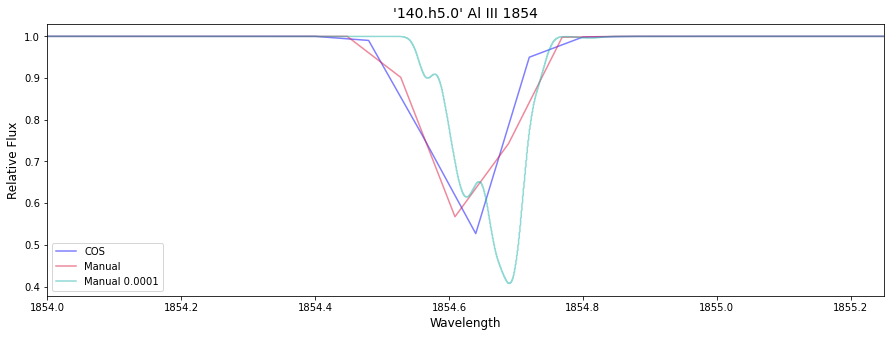

In [12]:
Alcosx = AlIII[0]
Alcosy = AlIII[1]

Alx = AlIII_2[0]
Aly = AlIII_2[1]

Alx3 = AlIII_3[0]
Aly3 = AlIII_3[1]

plt.figure(figsize=(15,5))
plt.plot(Alcosx,Alcosy, color='blue', alpha=0.5, label='COS')
plt.plot(Alx,Aly, color='crimson', alpha=0.5, label='Manual')
plt.plot(Alx3,Aly3, color='lightseagreen', alpha=0.5, label='Manual 0.0001')
plt.title("'140.h5.0' Al III 1854", fontsize=14)
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Relative Flux', fontsize=12)
plt.xlim(1854, 1855.25)
plt.legend()

## Testing COS-G140L on C IV

yt : [INFO     ] 2022-02-22 15:27:54,095 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
yt : [INFO     ] 2022-02-22 15:27:54,097 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-22 15:27:54,577 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-22 15:27:54,649 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-22 15:27:54,650 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-22 15:27:54,650 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-22 15:27:54,651 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-22 15:27:54,651 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-22 15:27:54,651 Setting instrument to COS-G140L
yt 

[1.0]
[1.0]


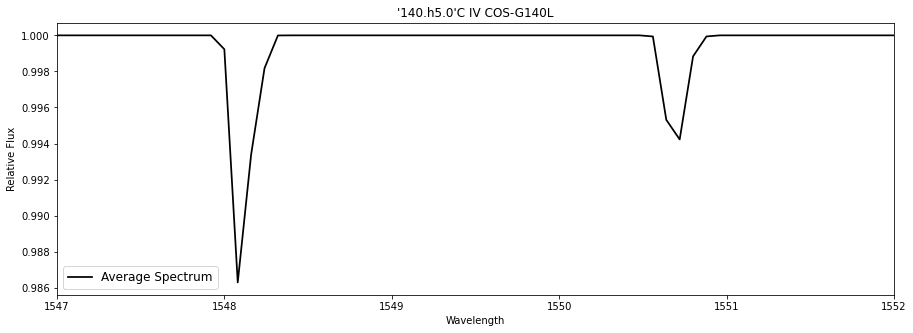

In [31]:
C140 = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'C IV' ,1547,1552, instrument='COS-G140L')

yt : [INFO     ] 2022-02-22 15:31:07,178 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-22 15:31:07,180 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-22 15:31:07,705 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-22 15:31:07,780 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-22 15:31:07,780 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-22 15:31:07,781 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-22 15:31:07,781 Parameters: domain_right_edge     

[1.0]
[1.0]


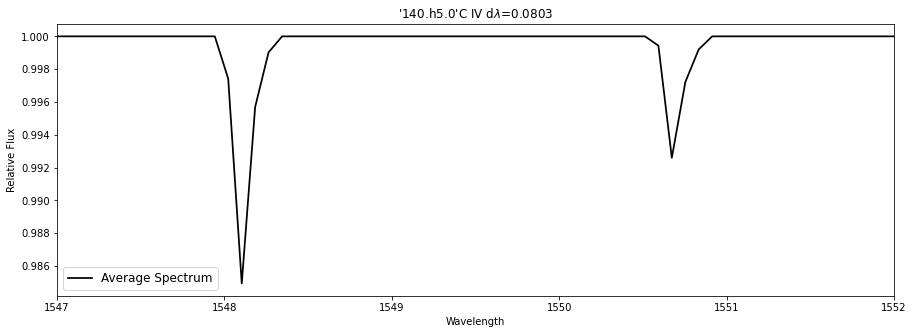

In [33]:
C140_ = spec_avg(0.91,0,0.493,0.91,1,0.493, 1,1, 'C IV' ,1547,1552, dl=0.0803)

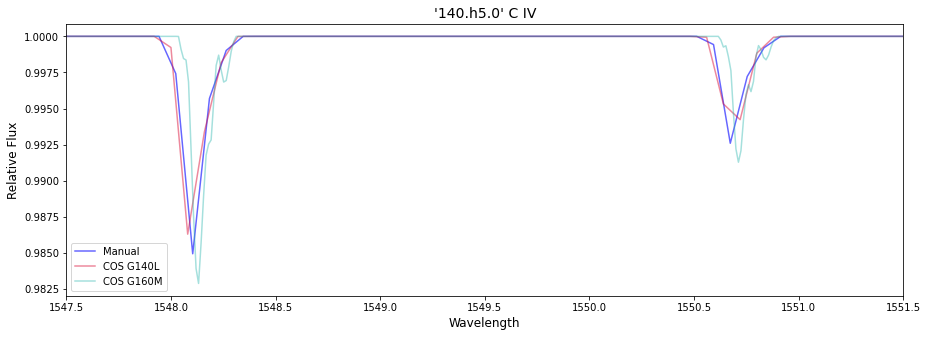

In [40]:
CIVcosx_ = C140_[0]
CIVcosy_ = C140_[1]

CIVx140 = C140[0]
CIVy140 = C140[1]

plt.figure(figsize=(15,5))
plt.plot(CIVcosx_,CIVcosy_, color='blue', alpha=0.6, label='Manual')
plt.plot(CIVx140,CIVy140, color='crimson', alpha=0.5, label='COS G140L')
plt.plot(CIVcosx,CIVcosy, color='lightseagreen', alpha=0.4, label='COS G160M')
plt.title("'140.h5.0' C IV", fontsize=14)
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Relative Flux', fontsize=12)
plt.xlim(1547.5, 1551.5)
plt.legend()